# **Results**

In [1]:
import matplotlib.pyplot as plt
import pickle
# import cv2

# For general use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For our classifiers
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neural_network
from sklearn import preprocessing

from os import listdir
from os.path import isfile, join

# For confusion matrix/data importing
from sklearn import metrics  
from sklearn.datasets import load_digits 

from PIL import Image

# For confusion matrix/data importing
from sklearn import metrics  
from sklearn.datasets import load_digits 

### Load Classifiers

In [2]:
with open('clf_digi.pk', 'rb') as fin:
    clf_digi = pickle.load(fin)
with open('clf_math.pk', 'rb') as fin:
    clf_math = pickle.load(fin)
with open('clf_all.pk', 'rb') as fin:
    clf_all = pickle.load(fin) 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/s

### get list of images

In [3]:
symbols = [str(x) for x in range(10)]

file_lists = {}
for symbol in symbols:
    mypath =  "img/"+symbol+"s"
    file_lists[symbol] = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    if(".DS_Store" in file_lists[symbol]):
        file_lists[symbol].remove(".DS_Store")

In [4]:
file_lists["1"]

['48.png',
 '49.png',
 '8.png',
 '9.png',
 '14.png',
 '12.png',
 '13.png',
 '11.png',
 '10.png',
 '4.png',
 '5.png',
 '7.png',
 '6.png',
 '2.png',
 '50.png',
 '3.png',
 '1.png',
 '47.png',
 '46.png',
 '0.png']

### Load Images

In [5]:

images = {}
for symbol in symbols:
    images[symbol] = []
    for file in file_lists[symbol]:
        path = "img/"+symbol+"s/"+file
        print(path)
        
        image = Image.open(path)
        # Scaling image down
        images[symbol].append(image.resize((45, 45)))

#         images[symbol].append(cv2.imread(path))
        
#         plt.figure(figsize=(0.5,0.5))
#         plt.imshow(cv2.imread(path))
#         plt.show()
    

img/0s/8.png
img/0s/9.png
img/0s/11.png
img/0s/10.png
img/0s/4.png
img/0s/5.png
img/0s/7.png
img/0s/6.png
img/0s/2.png
img/0s/3.png
img/0s/1.png
img/0s/0.png
img/1s/48.png
img/1s/49.png
img/1s/8.png
img/1s/9.png
img/1s/14.png
img/1s/12.png
img/1s/13.png
img/1s/11.png
img/1s/10.png
img/1s/4.png
img/1s/5.png
img/1s/7.png
img/1s/6.png
img/1s/2.png
img/1s/50.png
img/1s/3.png
img/1s/1.png
img/1s/47.png
img/1s/46.png
img/1s/0.png
img/2s/8.png
img/2s/9.png
img/2s/12.png
img/2s/13.png
img/2s/11.png
img/2s/10.png
img/2s/4.png
img/2s/56.png
img/2s/5.png
img/2s/55.png
img/2s/7.png
img/2s/54.png
img/2s/6.png
img/2s/2.png
img/2s/3.png
img/2s/53.png
img/2s/1.png
img/2s/52.png
img/2s/0.png
img/3s/8.png
img/3s/9.png
img/3s/12.png
img/3s/39.png
img/3s/11.png
img/3s/10.png
img/3s/38.png
img/3s/37.png
img/3s/4.png
img/3s/5.png
img/3s/41.png
img/3s/7.png
img/3s/6.png
img/3s/40.png
img/3s/2.png
img/3s/3.png
img/3s/1.png
img/3s/0.png
img/4s/8.png
img/4s/9.png
img/4s/12.png
img/4s/13.png
img/4s/11.png
img/4s

In [6]:
images_mono = {}
# Turning images into numerical values representing
#  brightness of each pixel
for symbol in symbols:
    images_mono[symbol] = []
    for i in images[symbol]:
        images_mono[symbol].append(np.asarray( i, dtype="int32" ))

In [7]:
# Reshaping digits
images_shaped = images_mono.copy()

for symbol in symbols:
    for image in range(len(images_shaped[symbol])):
        images_shaped[symbol][image] = images_shaped[symbol][image].reshape(-1, 45**2)

In [8]:
images_shaped["0"][0].shape

(1, 2025)

### Converting the pixel values


In [9]:
dfs = {}
for symbol in symbols:
    print("Math Symbol: "+symbol)
    print("Creating DF")
    dfs[symbol] = pd.DataFrame([images_shaped[symbol][i][0] for i in range(len(images_shaped[symbol]))])
#     print("Converting...")
#     dfs[symbol] = dfs[symbol].apply(lambda x : (x/32).astype(int) )
    print("")

Math Symbol: 0
Creating DF

Math Symbol: 1
Creating DF

Math Symbol: 2
Creating DF

Math Symbol: 3
Creating DF

Math Symbol: 4
Creating DF

Math Symbol: 5
Creating DF

Math Symbol: 6
Creating DF

Math Symbol: 7
Creating DF

Math Symbol: 8
Creating DF

Math Symbol: 9
Creating DF



The classifiers accept a 28x28 greyscale img. We need to convert our images to a format that the classifiers accept. The images come with varying sizes and are encoded using RGB.

#### Grayscale/Thresholding

In [10]:
# fig, axs = plt.subplots(1,3, figsize=(4, 4))
# fig.tight_layout(pad=0.25)


# axs[0].imshow(img)
# axs[0].set_title("Default")

# # Grayscale
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# axs[1].imshow(img_gray, cmap="Greys_r")
# axs[1].set_title("Grayscale")

# # Threshold
# _, img_thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY_INV)
# axs[2].imshow(img_thresh, cmap="Greys_r")
# axs[2].set_title("Threshold")

# plt.show()

#### Resizing

In [11]:
# print("Img shape before resizing:", img_thresh.shape)
# resized_img_28 = cv2.resize(img_thresh, (28, 28))
# resized_img_45 = cv2.resize(img_thresh, (45, 45))
# print("Img shape after resizing:", resized_img_28.shape)
# print("Img shape after resizing:", resized_img_45.shape)

# fig, axs = plt.subplots(1,3, figsize=(4, 4))
# fig.tight_layout(pad=0.25)

# axs[0].imshow(img_thresh)
# axs[0].set_title("Default")

# axs[1].imshow(resized_img_28)
# axs[1].set_title("Default")

# axs[2].imshow(resized_img_45)
# axs[2].set_title("Default")

# plt.show()

### Classification

In [12]:
# lookup = {
#     "0" : 0,
#     "1" : 1,
#     "2" : 2,   
#     "3" : 3,
#     "4" : 4,
#     "5" : 5,
#     "6" : 6,
#     "7" : 7,
#     "8" : 8,
#     "9" : 9,
#     "(" : 0,
#     ")" : 1,
#     "+" : 2,
#     "-" : 3,
#     "/" : 4,
# }

In [13]:
# symbol = lookup[clf_digit.predict([resized_img_28.ravel()])[0]]
# print("Digit Classification:")
# print("\tSymbol",symbol)
# print("\tConfidence",clf_digit.predict_proba([resized_img_28.ravel()])[0][symbol])

# symbol = clf_math.predict([resized_img_45.ravel()])[0]
# print("Math Classification:")
# print("\tSymbol",symbol)
# print("\tConfidence",clf_math.predict_proba([resized_img_45.ravel()])[0][lookup[symbol]])

# symbol = clf.predict([resized_img_28.ravel()])[0]
# print("General Classification:")
# print("\tSymbol",symbol)
# print("\tConfidence",clf.predict_proba([resized_img_28.ravel()])[0][lookup[symbol]])

In [14]:
# functions for testing
def compress_array(A, initx, inity, endx, endy):
    arr = (A.reshape(initx,inity)).astype('uint8') # sample array
    im = Image.fromarray(arr) # monochromatic image
    im = im.resize((endx,endy))
    return np.array(im)

def testImg(arr):
    initx = int(np.sqrt(len(arr)))
    inity = initx

    arrM = compress_array(arr, initx, inity, 45, 45).reshape(1,-1)
    arrD = compress_array(arr, initx, inity, 28, 28).reshape(1,-1)

    probM = clf_math.predict_proba(arrM)[0]
    probD = clf_digi.predict_proba(arrD)[0]
    probA = clf_all.predict_proba(arrD)[0]

    print("Math: ------------------------------")
    plt.imshow(arrM.reshape(45,45), cmap=plt.cm.binary)
    plt.title(clf_math.predict(arrM)[0])
    plt.show()
    for p, c in sorted(zip(probM, clf_math.classes_)):
        print(c, "  ::  ", p)

    print("\nDigit: ---------------------------")
    plt.imshow(arrD.reshape(28,28), cmap=plt.cm.binary)
    plt.title(clf_digi.predict(arrD)[0])
    plt.show()
    for p, c in sorted(zip(probD, clf_digi.classes_)):
        print(c, "  ::  ", p)

    print("\nAll: ------------------------------")
    plt.imshow(arrD.reshape(28,28), cmap=plt.cm.binary)
    plt.title(clf_all.predict(arrD)[0])
    plt.show()
    for p, c in sorted(zip(probA, clf_all.classes_)):
        print(c, "  ::  ", p)
        
# Functions for finding combined classification
def predict_as_dictionary(clf, arr, num):
    initx = int(np.sqrt(len(arr)))
    inity = initx
    arr2 = compress_array(arr, initx, inity, num, num).reshape(1,-1)
    return dict(zip(clf.classes_, clf.predict_proba(arr2)[0]))

def classify(arr):
    probM = predict_as_dictionary(clf_math, arr, 45)
    probD = predict_as_dictionary(clf_digi, arr, 28)
    probAll = predict_as_dictionary(clf_all, arr, 28)
    
    prob_M_D = {**probM, **probD}
    
    prob_true = {}
    for symbol in symbols:
        prob_true[symbol] = probAll[symbol]*prob_M_D[symbol]

    print("\n\nCombined prediction ------------------------------------------")
    for i in sorted(zip(prob_true.values(), symbols)):
        print(i)

### Making a scaled copy of the data

In [15]:
sc_list = []
for symbol in symbols:
    temp = dfs[symbol].copy()
    temp["class"] = symbol
    sc_list.append(temp)
    
sc_df = pd.concat(sc_list)
features = [x for x in sc_df]
features.remove("class")
# sc_df

X = np.array(sc_df[features].values)
y = sc_df["class"].values

sc = preprocessing.StandardScaler()
sc_X = sc.fit_transform(X)

sc_dict = {}
for symbol in symbols:
    sc_dict[symbol] = []

for i in range(len(sc_X)):
    sc_dict[y[i]].append(sc_X[i])



# sc_X = sc.fit_transform(sc_df[features].values)
# sc_y = sc_df["class"]

# sc_dict = {}
# for symbol in symbols:
#     sc_dict[symbol] = pd[pd["class"] == symbol]
    
# sc_dict["0"]

# sc_dict = {}
# for symbol in symbols

In [16]:
sc_dict["0"][0].shape

(2025,)

In [66]:
with open('DT.pk', 'rb') as fin:
    clf_DT = pickle.load(fin)
with open('KN.pk', 'rb') as fin:
    clf_KN = pickle.load(fin)
with open('GA.pk', 'rb') as fin:
    clf_GA = pickle.load(fin)
with open('NN.pk', 'rb') as fin:
    clf_NN = pickle.load(fin)
with open('sc_NN.pk', 'rb') as fin:
    sc_clf_NN = pickle.load(fin)
with open('sc_KN.pk', 'rb') as fin:
    sc_clf_KN = pickle.load(fin)

correct_DT = 0
correct_KN = 0
correct_GA = 0
correct_NN = 0
correct_sc_NN = 0
correct_sc_KN = 0
count = 0

comb = 0
misclassified = []
for symbol in symbols:
    print(symbol)
    
    for image, sc_image in zip(dfs[symbol].values, sc_dict[symbol]):
#         print(image.shape)
#         print(sc_image.shape)
        count += 1
        image = image.reshape(1, -1)
        sc_image = sc_image.reshape(1, -1)

        print(symbol)
        print(clf_KN.predict(image)[0])
        print(clf_DT.predict(image)[0])
        print(clf_GA.predict(image)[0])
        print(clf_NN.predict(image)[0])
        print(sc_clf_NN.predict(image)[0])
        print(sc_clf_KN.predict(image)[0])
        print("-----------------------\n\n")

        if(clf_DT.predict(image)[0] == symbol):
            correct_DT += 1
        if(clf_KN.predict(image)[0] == symbol):
            correct_KN += 1
        if(clf_GA.predict(image)[0] == symbol):
            correct_GA += 1
        if(clf_NN.predict(image)[0] == symbol):
            correct_NN += 1        

        if(sc_clf_NN.predict(sc_image)[0] == symbol):
            correct_sc_NN += 1
        if(sc_clf_KN.predict(sc_image)[0] == symbol):
            correct_sc_KN += 1
            
        # Testing combined goodness
        c = combinedCLassification([sc_clf_NN, sc_clf_KN], sc_image)[-1:][0][1]
        if(c == symbol):
            comb += 1
            
            
        if(sc_clf_NN.predict(sc_image)[0] != symbol):
            misclassified.append([image, sc_image])
            
            

print("DT: ", correct_DT)
print("KN: ", correct_KN)
print("GA: ", correct_GA)
print("NN: ", correct_NN)
print("sc_NN: ", correct_sc_NN)
print("sc_KN: ", correct_sc_KN)
print("comb: ", comb)
print("count: ", count)

0
0
0
0
0
0
0
0
-----------------------


0
0
0
0
0
0
0
-----------------------


0
0
0
0
0
0
0
-----------------------


0
0
0
0
0
0
0
-----------------------


0
1
0
0
0
0
0
-----------------------


0
0
2
2
0
0
0
-----------------------


0
6
2
9
0
0
0
-----------------------


0
0
0
9
6
0
0
-----------------------


0
0
0
0
0
0
0
-----------------------


0
0
0
0
0
0
0
-----------------------


0
0
0
0
0
0
0
-----------------------


0
0
0
0
0
0
0
-----------------------


1
1
1
1
1
1
1
1
-----------------------


1
1
1
1
1
1
1
-----------------------


1
1
2
4
3
9
4
-----------------------


1
1
1
4
7
2
4
-----------------------


1
1
2
2
5
8
9
-----------------------


1
1
1
1
1
1
1
-----------------------


1
1
3
9
1
2
1
-----------------------


1
1
8
6
8
8
9
-----------------------


1
1
3
6
5
8
8
-----------------------


1
1
3
2
1
8
6
-----------------------


1
1
6
2
5
8
4
-----------------------


1
1
2
6
2
8
0
-----------------------


1
9
2
9
8
8
0
----------------------

In [65]:
# for image in misclassified:
#     NN_pred = sc_clf_NN.predict(image[1])[0]
#     KN_pred = sc_clf_KN.predict(image[1])[0]
    
#     print(sc_clf_NN.predict_proba(image[0]))
#     print(sc_clf_KN.predict_proba(image[0]))
#     print("------------------------------------")
#     plt.title(f"NN: {NN_pred}.  KN: {KN_pred}")
#     plt.imshow(image[0].reshape(45,45))
#     plt.show()

c = combinedCLassification([sc_clf_NN, sc_clf_KN], sc_image)[-1:][0][1]
c

'4'

In [47]:
def combinedCLassification(clfs, sample):
    pred_probs = []
    for clf in clfs:
        probs = clf.predict_proba(sample)[0]
        classes = clf.classes_
        pred_probs.append(sorted(zip(classes, probs)))

    symbols = [x[0] for x in total_probs[0]]


    pred_probs[0][0][0]
    symbols
    comb_dict = {}
    for symbol in symbols:
        comb_dict[symbol] = 1

    for pred_prob in pred_probs:
        for prob in pred_prob:
            comb_dict[prob[0]] *= prob[1]
        
# for prob, symbol in sorted(zip(comb_dict.values(), comb_dict.keys())):
#     print(symbol, "  :: ", prob)
    return sorted(zip(comb_dict.values(), comb_dict.keys()))

1   ::  0.024152952364799866


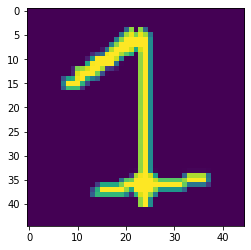

<Figure size 72x72 with 0 Axes>

9   ::  0.0028212882903617593


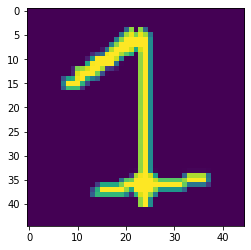

<Figure size 72x72 with 0 Axes>

9   ::  0.08246719065883339


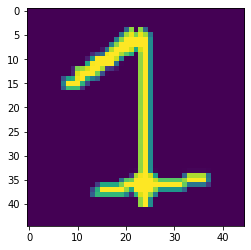

<Figure size 72x72 with 0 Axes>

1   ::  0.0008084708775811886


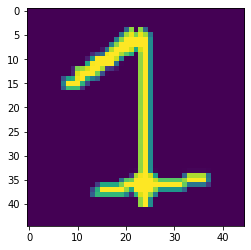

<Figure size 72x72 with 0 Axes>

1   ::  0.26252820722600884


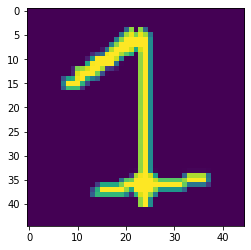

<Figure size 72x72 with 0 Axes>

1   ::  0.003319963172790554


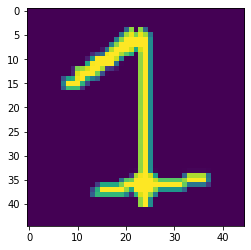

<Figure size 72x72 with 0 Axes>

1   ::  0.0003895279554969112


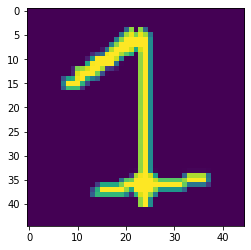

<Figure size 72x72 with 0 Axes>

7   ::  0.12401789531353727


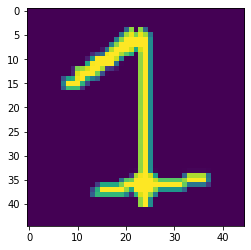

<Figure size 72x72 with 0 Axes>

8   ::  0.1999702019644744


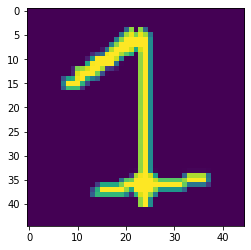

<Figure size 72x72 with 0 Axes>

2   ::  0.040140091231150365


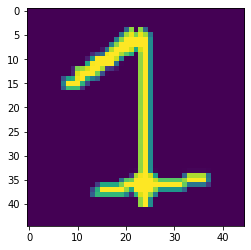

<Figure size 72x72 with 0 Axes>

2   ::  0.0032997430012566453


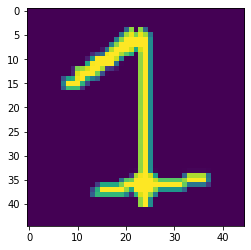

<Figure size 72x72 with 0 Axes>

5   ::  0.11136905120900817


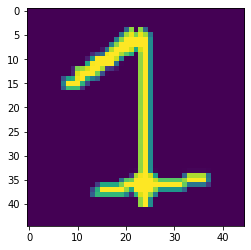

<Figure size 72x72 with 0 Axes>

1   ::  3.376703360801232e-05


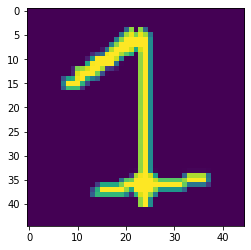

<Figure size 72x72 with 0 Axes>

2   ::  0.13076548884477357


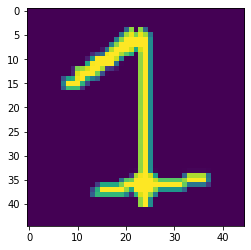

<Figure size 72x72 with 0 Axes>

7   ::  0.2930003146678529


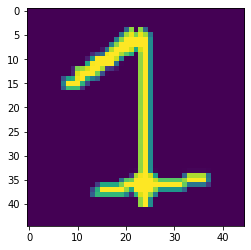

<Figure size 72x72 with 0 Axes>

9   ::  0.3727446813983107


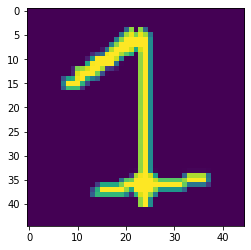

<Figure size 72x72 with 0 Axes>

3   ::  0.300227487375487


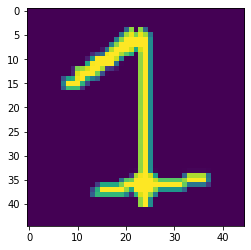

<Figure size 72x72 with 0 Axes>

6   ::  0.29753090333103127


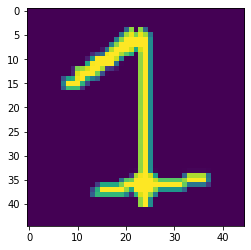

<Figure size 72x72 with 0 Axes>

3   ::  0.22607929242066555


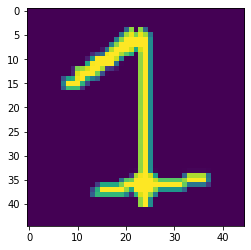

<Figure size 72x72 with 0 Axes>

1   ::  0.0307335736820924


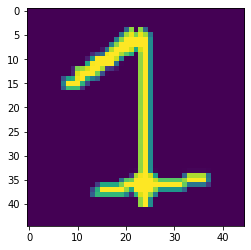

<Figure size 72x72 with 0 Axes>

6   ::  0.7633828867456866


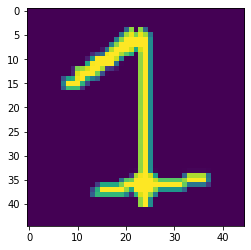

<Figure size 72x72 with 0 Axes>

4   ::  0.20035241470969817


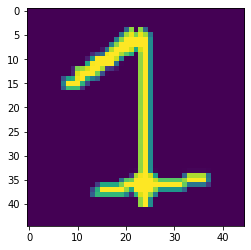

<Figure size 72x72 with 0 Axes>

1   ::  0.3853587727469966


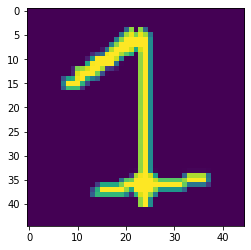

<Figure size 72x72 with 0 Axes>

4   ::  0.11721002404212819


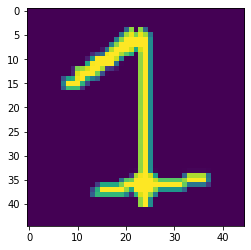

<Figure size 72x72 with 0 Axes>

9   ::  0.6642703713134523


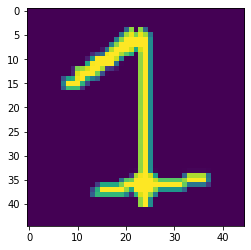

<Figure size 72x72 with 0 Axes>

7   ::  0.008730062096121698


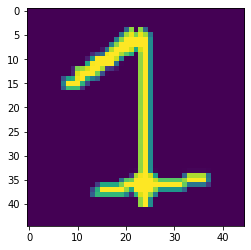

<Figure size 72x72 with 0 Axes>

7   ::  0.15528421230081874


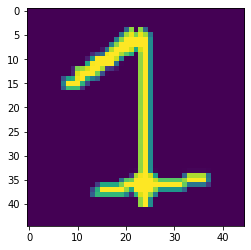

<Figure size 72x72 with 0 Axes>

6   ::  0.27780127668086946


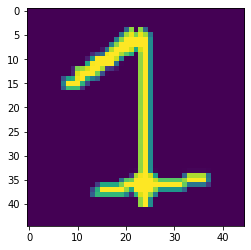

<Figure size 72x72 with 0 Axes>

0   ::  0.6283581373680873


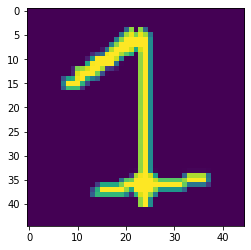

<Figure size 72x72 with 0 Axes>

1   ::  0.07110679811727483


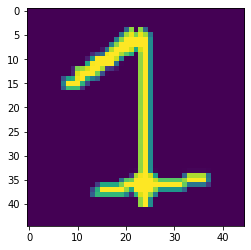

<Figure size 72x72 with 0 Axes>

7   ::  0.14453513365684717


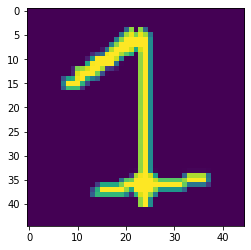

<Figure size 72x72 with 0 Axes>

1   ::  0.3833152620766022


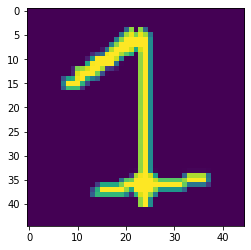

<Figure size 72x72 with 0 Axes>

2   ::  0.2717844230543156


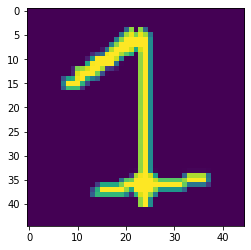

<Figure size 72x72 with 0 Axes>

0   ::  0.6318587165514971


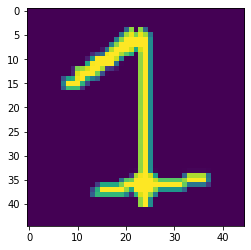

<Figure size 72x72 with 0 Axes>

3   ::  0.00010468849734090647


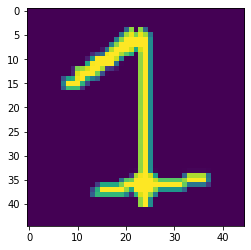

<Figure size 72x72 with 0 Axes>

0   ::  0.2478172834531603


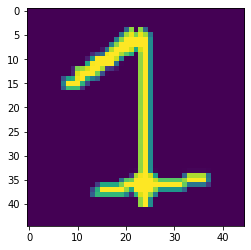

<Figure size 72x72 with 0 Axes>

1   ::  0.00020625990997563792


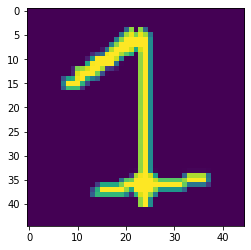

<Figure size 72x72 with 0 Axes>

9   ::  0.00015619609667166383


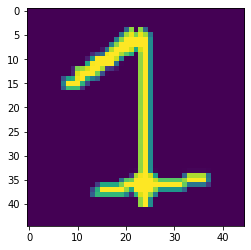

<Figure size 72x72 with 0 Axes>

4   ::  0.20117176205447518


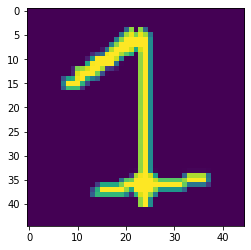

<Figure size 72x72 with 0 Axes>

In [58]:
for mis in misclassified:
    t = combinedCLassification([sc_clf_NN, sc_clf_KN], mis[1])

    for prob, symbol in t[-1:]:
        print(symbol, "  :: ", prob)

    plt.imshow(misclassified[0][0].reshape(45,45))
    plt.figure(figsize=(1,1))
    plt.show()

In [54]:
sc_clf_KN.predict_proba(misclassified[2][1])

array([[0.        , 0.66666667, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333333]])